#### 모델 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피  쳐 : Weight, Length
- 타  겟 : Species
- 기계학습: 지도학습 + 분류 (도미, 빙어 분류는 이진 분류)

(1) 모듈 로딩 및 데이터 준비 <hr>

In [336]:
# 데이터 분석 모듈 로딩
import pandas as pd

In [337]:
# 데이터 파일 설정
data_file = '../data/fish.csv'

In [338]:
# DF로 데이터 준비
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2])
#fishDF = pd.read_csv(data_file, usecols= ['Species', 'Weight', 'Length'])

# 기본정보 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리
- 결측치, 중복데이터, 이상치

In [339]:
# 컬럼별 고유값으로 이상치 체크 => unique()
print(f"fishDF.Species.unique() => {fishDF.Species.unique()}")
print('-'*40)
print(f"fishDF.Weight.unique() => {fishDF.Weight.unique()}")
print('-'*40)
print(f"fishDF.Length.unique() => {fishDF.Length.unique()}")

fishDF.Species.unique() => ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
----------------------------------------
fishDF.Weight.unique() => [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
----------------------------------------
fishDF.Length.unique() => [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  

In [340]:
# 결측치 체크 => isna() / isnull()
fishDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [341]:
# 중복데이터 => duplicated()
fishDF.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 159, dtype: bool

In [342]:
fishDF.duplicated().sum()

4

In [343]:
fishDF[fishDF['Species'] == 'Bream']

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [344]:
fishDF[fishDF['Species'] == 'Smelt']

,Species,Weight,Length
145,Smelt,6.7,9.8
146,Smelt,7.5,10.5
147,Smelt,7.0,10.6
148,Smelt,9.7,11.0
149,Smelt,9.8,11.2
150,Smelt,8.7,11.3
151,Smelt,10.0,11.8
152,Smelt,9.9,11.8
153,Smelt,9.8,12.0
154,Smelt,12.2,12.2


In [345]:
# 'bream', 'smelt' 이 두 가지 품종 데이터만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])
twoFishDf = fishDF[mask]

# 인덱스 리셋 : 기존에 인덱스 삭제 후 0 - base 인덱스 설정
# Scikit-learn에 저장시 ndarray 타입으로 저장되면서 인덱스 정리
twoFishDf = twoFishDf.reset_index(drop=True)
#리셋인덱스를 안했다면 원래 인덱스가 데이터프레임 안에 남아있다.
#twoFishDf = twoFishDf.reset_index()

# 기본 정보 확인
twoFishDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


(3) 학습용 데이터 준비 => 피쳐 + 타겟 분리

In [346]:
# 피쳐 데이터 추출
feature = twoFishDf[twoFishDf.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [347]:
# 타겟 데이터 추출
target = twoFishDf.Species

# Bream => 0, Smelt => 1 로 변환, 복사본 생성
target = target.replace({'Bream':0, 'Smelt':1}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep = '\n\n')

0    0
1    0
2    0
Name: Species, dtype: int64

46    1
47    1
48    1
Name: Species, dtype: int64


(4) 학습 진행
    - 알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 : KNN
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier 
    - 학습 진행 메서드 => fit( )

In [348]:
# 모듈로딩
from sklearn.neighbors import KNeighborsClassifier

In [349]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model

#model.classes_
#이렇게 마지막에 언더바가 붙은건 데이터를 가져오기전까지는 쓰지 못한다.

KNeighborsClassifier()

In [350]:
# (4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)
# 이렇게 진행시키면 학습이 끝난것! 간단하다...

KNeighborsClassifier()

In [351]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터  => 모델 학습 후 생성 및 저장됨
print("classes_ : ", model.classes_)
print("feature_names_in_: ", model.feature_names_in_)
print("n_features_in_: ", model.n_features_in_)
# 이제는 적용가능하다!. 데이터가 들어간 이후에 적용한것이기떄문이다.

classes_ :  [0 1]
feature_names_in_:  ['Weight' 'Length']
n_features_in_:  2


(5) 학습 후 검사 즉 테스트 => 메서드 : score()
- 결과값 : 0.0(0%) ~ 1.0(100%) 
- 사용 데이터 : 학습에 사용되지 않은 데이터

In [352]:
model.score(feature, target)
# 당연한 얘기이지만 원본데이터를 주고 시험쳤더니 모두 다 맞았다.

1.0

(6) 예측 즉 서비스에 모델 활용시 사용 => 메서드 : predict()
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [353]:
# 들어가야할 데이터 [무게, 길이]

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict([(19.9, 15)])  #2차원데이터로 넣어줘야 돌아간다
# UserWarning: X does not have valid feature names (학습시 이름까지 있었는데 여기서는 없으니까)
pred_y

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [354]:
# 그럼 워닝이 뜨지 않게 넣을 값을 다시 설정해보자

# [무게, 길이]
new_data = pd.DataFrame([[19.9, 15]], columns = model.feature_names_in_)
# 학습 시 제공된 데이터와 동일한 형태로 제공 
pred_y = model.predict(new_data)

pred_y

array([1], dtype=int64)

In [355]:
# 예측 확률
model.predict_proba(new_data)      # 결과에 대한 확률값을 가져온다

array([[0., 1.]])

getter/setter 메서드
=> 속성값 설정   => setter 메서드  set_속성명()
=> 속성값 설정 읽기 => getter 메서드 get_속성명()

In [356]:
# 데이터와 최근접 이웃 데이터
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)
print(dis, ind)

# 반환값에서,,
# 0번 인덱스 : 최근접이웃 데이터들의 거리
# 1번 인덱스 : feature에서 행 번호
#                ㄴ 아까 reset_index를 해둔 덕분에 원본 csv 파일의 인덱스 번호가 나오지 않는다!
#                ㄴ 만약 reset_index를 하지 않았다면 백 몇번의 인덱스 번호가 나왔을 것

[[0.         0.72801099 7.00071425 7.95550124 8.19328994]] [[48 47 45 46 44]]


In [357]:
# ndarray => list
ind.tolist()[0]

[48, 47, 45, 46, 44]

In [358]:
# 위에서 인덱스로 뽑아줬다.
# 그러면 원하는 인덱스만 뽑고싶다면 iloc으로 접근하면 된다.

# K개의 최근접 이웃 데이터만 저장
kneighDf = feature.iloc[ind.tolist()[0]]
kneighDf

,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


(7) 확인 => Weight & Length 시각화

<Axes: title={'center': 'Weight & Length'}, xlabel='Weight', ylabel='Length'>

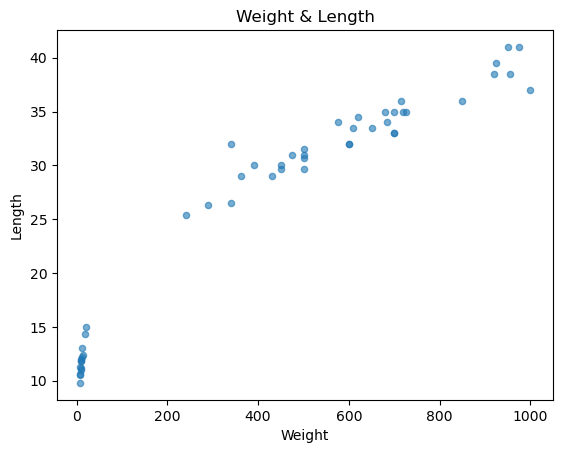

In [359]:
# pandas의 Series, DataFrame의 plot() 메서드

#feature.plot.scatter(x = 'Weight', y = 'Length', c = 'orange')
feature.plot(kind = 'scatter', x= 'Weight', y= 'Length', title = 'Weight & Length', alpha = 0.6)

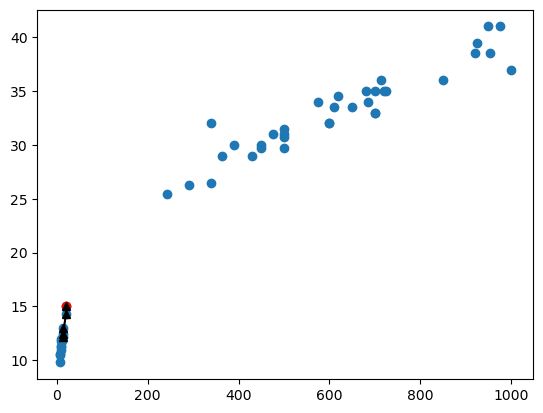

In [360]:
# matplotlib 사용

import matplotlib.pyplot as plt

#데이터 시각화
plt.scatter(x = feature.Weight, y=feature.Length)

# 새로운 데이터 시각화
plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')

#새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.plot(kneighDf.Weight, kneighDf.Length, 'k^-')

plt.show()

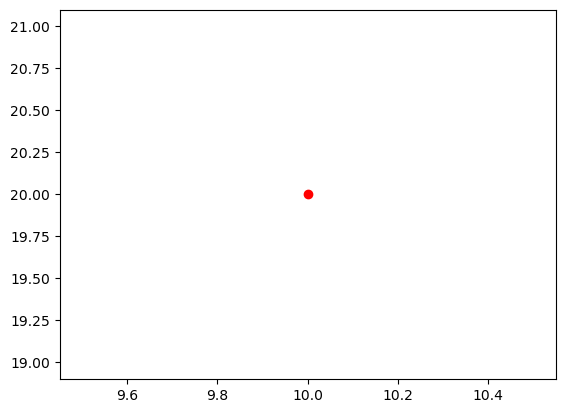

In [361]:
plt.plot(10, 20, 'ro')

참고

In [362]:
print(new_data.Weight.to_list()[0], new_data.Length.to_list()[0])

19.9 15


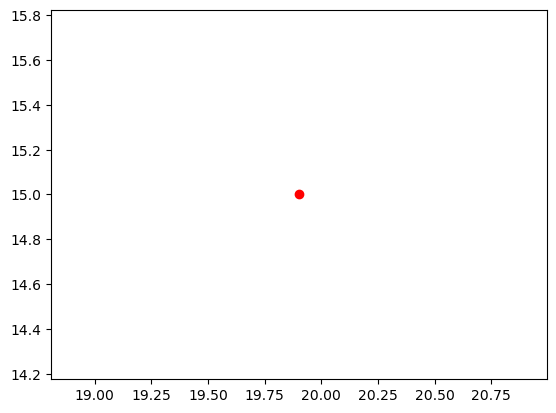

In [363]:
plt.plot(new_data.Weight.to_list()[0], new_data.Length.to_list()[0], 'ro')